<a href="https://colab.research.google.com/github/Shaik1903/Learning_Pytorch/blob/main/Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a simple dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Initialize the StandardScaler
scaler = StandardScaler()

# Step 1: Fit the scaler on the training data to calculate mean and standard deviation
scaler.fit(data)

# Display mean and standard deviation calculated from fitting
print("Mean:", scaler.mean_)
print("Standard Deviation:", scaler.scale_)
# Step 2: Transform the data using the calculated parameters
transformed_data = scaler.transform(data)

# Display the transformed data
print("Transformed Data:")
print(transformed_data)

# Alternatively, we can combine fit and transform using fit_transform
transformed_data_combined = scaler.fit_transform(data)

# Display the transformed data using fit_transform
print("Transformed Data using fit_transform:")
print(transformed_data_combined)


Mean: [4. 5. 6.]
Standard Deviation: [2.44948974 2.44948974 2.44948974]
Transformed Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
Transformed Data using fit_transform:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
weights = 0.7
biass = .3
y = weights*X + biass
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X)

50

In [ ]:
x_train,y_train,x_test,y_test = X[:40],y[:40],X[40:],y[40:]
x_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
def visual(xtrain = x_train,ytrain = y_train , xtest = x_test,ytest = y_test,pred = None):
  plt.figure(figsize = (8,4))
  plt.scatter(xtrain,ytrain,c='b',label = 'train')
  plt.scatter(xtest,ytest,c='r',label = 'test')
  if pred != None:
    plt.scatter(xtest,pred,c='g',label = 'pred')


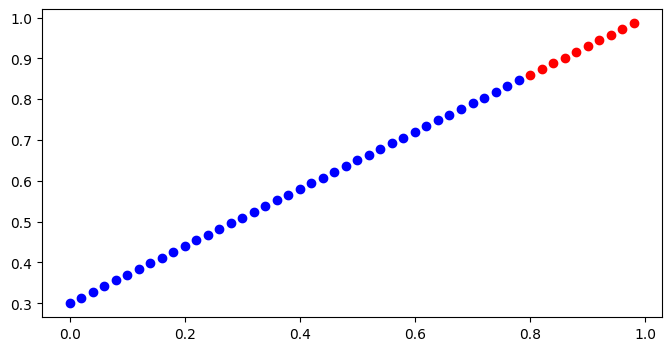

In [ ]:
visual()

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
class LinR(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias  = nn.Parameter(torch.randn(1))
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weight*x + self.bias

In [ ]:
# predictions with inference mode
torch.manual_seed(42)
model = LinR()
with torch.inference_mode():         # samw with torch.no_grad()
  y_pred = model(x_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

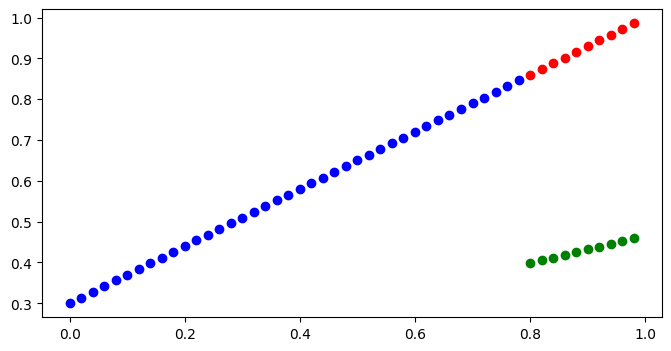

In [ ]:
visual(pred = y_pred)

In [ ]:
loss = nn.L1Loss()

In [ ]:
optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.01)

In [ ]:
epochs = 200

In [ ]:
weights,biass

(0.7, 0.3)

In [ ]:
ep = []
test_loss = []
train_loss = []

In [ ]:
for epoch in range(epochs):
  # forward propagation
  model.train()
  pred = model(x_train)

  # calculate the loss
  lass = loss(pred,y_train)
  print(f"loss = {lass}")

  # optimizer zero grad
  optimizer.zero_grad()

  # perform back propagation on the loss with respect to the parameters
  lass.backward()

  # step the optimizer
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test = model(x_test)
    las = loss(test,y_test)
    ep.append(epoch)
    train_loss.append(lass)
    test_loss.append(las)
  if epoch%10 == 0:
    print(f"epoch: {epoch}  train loss: {lass}  test loss: {las}")
    model.state_dict()

loss = 0.31288138031959534
epoch: 0  train loss: 0.31288138031959534  test loss: 0.48106518387794495
loss = 0.3013603389263153
loss = 0.28983935713768005
loss = 0.2783183455467224
loss = 0.26679736375808716
loss = 0.2552763521671295
loss = 0.24375534057617188
loss = 0.23223432898521423
loss = 0.22071333229541779
loss = 0.20919232070446014
loss = 0.1976713240146637
epoch: 10  train loss: 0.1976713240146637  test loss: 0.3463551998138428
loss = 0.18615034222602844
loss = 0.1746293306350708
loss = 0.16310831904411316
loss = 0.1515873372554779
loss = 0.14006635546684265
loss = 0.1285453587770462
loss = 0.11702437698841095
loss = 0.1060912236571312
loss = 0.09681284427642822
loss = 0.08908725529909134
epoch: 20  train loss: 0.08908725529909134  test loss: 0.21729660034179688
loss = 0.08227583020925522
loss = 0.07638873159885406
loss = 0.07160007208585739
loss = 0.06747635453939438
loss = 0.06395438313484192
loss = 0.06097004935145378
loss = 0.05845819041132927
loss = 0.05635259300470352
los

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_pred = model(x_test)
y_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

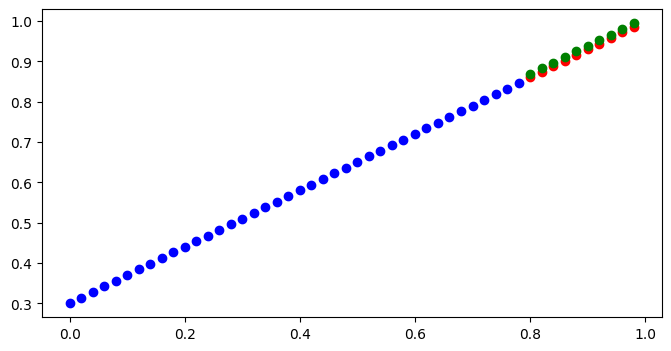

In [ ]:
visual(pred = y_pred)

In [ ]:
# Plot the Testing and training curves
import numpy as np

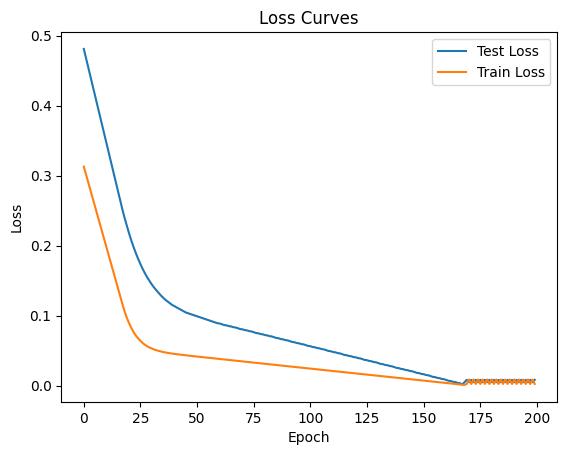

In [ ]:
plt.plot(ep, test_loss, label="Test Loss")
plt.plot(ep, np.array(torch.tensor(train_loss).numpy()), label="Train Loss")  # Detach the tensor
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Saving a model in Pytorch
from  pathlib import Path
mod_path = Path('Models')
mod_path.mkdir(parents = True, exist_ok = True)

In [ ]:
Model_Name = 'lin_trail.pth'
Model_path = mod_path / Model_Name

In [ ]:
torch.save(obj = model.state_dict(),
           f = Model_path
           )

In [ ]:
Model_0 = LinR()

In [ ]:
Model_0.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [ ]:
Model_0.load_state_dict(torch.load(Model_path))    # Loading the state_dicts

<All keys matched successfully>

In [ ]:
Model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
class LineR(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear_Layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.Linear_Layer(x)

In [ ]:
class Lin2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = LineR()
model_1.state_dict()

OrderedDict([('Linear_Layer.weight', tensor([[0.7645]])),
             ('Linear_Layer.bias', tensor([0.8300]))])

In [ ]:
epochs  = 200

In [ ]:
loss = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(x_train)

  # 2. Calculate the loss
  lass = loss(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  lass.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 10 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 20 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 30 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 40 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 50 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 60 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 70 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 80 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 90 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 100 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 110 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 120 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 130 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 140 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 150 | Loss: L1Loss() | Test loss: 0.013801807537674904
Epoch: 160 | Loss: 

In [ ]:
!pip install gensim


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Define the corpus (a list of text documents)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Step 2: Create a CountVectorizer object
vectorizer = CountVectorizer()

# Step 3: Fit the vectorizer on the corpus and transform the text into a BoW representation
bow_representation = vectorizer.fit_transform(corpus)

# Step 4: Get the feature names (unique words in the corpus)
feature_names = vectorizer.get_feature_names_out()

# Step 5: Print the BoW representation and feature names
print("BoW representation:")
print(bow_representation.toarray())
print("Feature names:")
print(feature_names)


BoW representation:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Feature names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Define the corpus (a list of text documents)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Step 2: Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Step 3: Fit the vectorizer on the corpus and transform the text into a TF-IDF representation
tfidf_representation = vectorizer.fit_transform(corpus)

# Step 4: Get the feature names (unique words in the corpus)
feature_names = vectorizer.get_feature_names_out()

# Step 5: Print the TF-IDF representation and feature names
print("TF-IDF representation:")
print(tfidf_representation.toarray())
print("Feature names:")
print(feature_names)


TF-IDF representation:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
Feature names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Define the text data and corresponding labels
texts = [
    "This is a positive review.",
    "I loved this movie!",
    "The plot was intriguing.",
    "Not a fan of this book.",
    "The acting was terrible.",
    "Highly recommended!",
]
labels = [1, 1, 1, 0, 0, 1]  # 1: Positive, 0: Negative

# Step 2: Tokenize the text and convert it to sequences of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Step 3: Pad the sequences to make them of equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 4: Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train the model
model.fit(padded_sequences, np.array(labels), epochs=52, batch_size=2)

# Step 7: Make predictions on new data
new_texts = [
    "This movie is fantastic!",
    "The book was disappointing.",
    "I highly recommend it!",
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions = model.predict(new_padded_sequences)

# Step 8: Print the predictions
for i, text in enumerate(new_texts):
    sentiment = "Positive" if predictions[i][0] > 0.5 else "Negative"
    print(f"'{text}' has a {sentiment} sentiment.")


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Step 1: Prepare the corpus (a list of sentences or words)
# In this example, we use Gensim's common_texts as the corpus for demonstration.
corpus = common_texts

# Step 2: Create a Word2Vec model with the Skip-gram architecture
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=1)

# Step 3: Get the word vector for a specific word
word_vector = model.wv['computer']
print("Word vector for 'computer':")
print(word_vector)

# Step 4: Find similar words to a given word
similar_words = model.wv.most_similar('trees', topn=5)
print("Similar words to 'Trees':")
print(similar_words)


Word vector for 'computer':
[-0.00515774 -0.00667028 -0.0077791   0.00831315 -0.00198292 -0.00685696
 -0.0041556   0.00514562 -0.00286997 -0.00375075  0.0016219  -0.0027771
 -0.00158482  0.0010748  -0.00297881  0.00852176  0.00391207 -0.00996176
  0.00626142 -0.00675622  0.00076966  0.00440552 -0.00510486 -0.00211128
  0.00809783 -0.00424503 -0.00763848  0.00926061 -0.00215612 -0.00472081
  0.00857329  0.00428459  0.0043261   0.00928722 -0.00845554  0.00525685
  0.00203994  0.0041895   0.00169839  0.00446543  0.0044876   0.0061063
 -0.00320303 -0.00457706 -0.00042664  0.00253447 -0.00326412  0.00605948
  0.00415534  0.00776685  0.00257002  0.00811905 -0.00138761  0.00808028
  0.0037181  -0.00804967 -0.00393476 -0.0024726   0.00489447 -0.00087241
 -0.00283173  0.00783599  0.00932561 -0.0016154  -0.00516075 -0.00470313
 -0.00484746 -0.00960562  0.00137242 -0.00422615  0.00252744  0.00561612
 -0.00406709 -0.00959937  0.00154715 -0.00670207  0.0024959  -0.00378173
  0.00708048  0.00064041 